In [ ]:
# Working title: the fourier transform and characteristic functions

In [137]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Reminders

Before diving into the fourier transform, recall the relationship between complex exponentials and $\sin$ and $\cos$:
1. Most fundamentally: $\exp(i \nu x) = \cos(\nu x) + i \sin(\nu x)$
2. As a consequence: $\cos(\nu x) = \frac{1}{2} \left[ \exp(i \nu x) + \exp(-i \nu x) \right] $ and similarly, $\sin(\nu x) = \frac{1}{2i} \left[\exp(i \nu x) - \exp(i \nu x) \right]$

You can informally see why this is the case by looking at the McLauren series for $\exp$, $\sin$, and $\cos$:
$$\sin(\nu x) + \cos(\nu x) $$

# Fourier Transform Definition and Intuition

## Definition

The "Fourier transform" is a misleading name, because it actually encompasses two transfromations! 
1. First, the *forward transform* of a function $f(t)$ is defined as follows:
    $$F(\nu) = \int_{-\infty}^{\infty} f(t) e^{- 2 \pi i \nu t} dt $$
2. Second, we can reverse this transformation (and compute $f$ from $F$) in the appropriately named *inverse transform*:
    $$f(t) = \int_{-\infty}^{\infty} F(\nu) e^{2 \pi i \nu t} d\nu $$

Where did these equations come from? There are a myriad motivations of the Fourier transform, but the main one is as follows.

## Motivation of Inverse Transform

Suppose we have a rather complicated, but *periodic* function of time $f(t)$ like below:



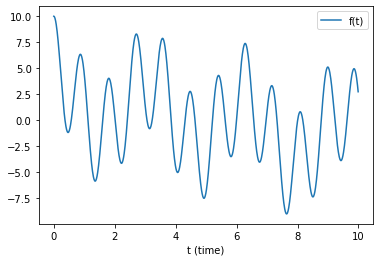

In [70]:
t = (np.arange(0, 1000, 1)/100)
ft = 5*np.cos(7*t) + 3*np.cos(2*t) + 2*np.cos(0.3*t)
plt.plot(t, ft, label = 'f(t)')
plt.xlabel('t (time)')
plt.legend()
plt.show()

This function looks vaguely periodic, but to better understand it we might want to decompose it into simpler functions. For example, we might approximate it as the sum of two cosine functions, which we understand very well:
$$ f(t) \approx 5 \cos(7t) + 5 \cos (2t) $$

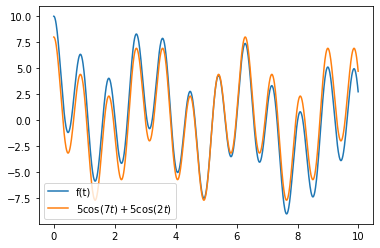

In [71]:
plt.plot(t, ft, label = 'f(t)')
plt.plot(t, 5*np.cos(7*t) + 3*np.cos(2*t), label = '$5\cos(7t) + 5\cos(2t)$')
plt.legend()
plt.show()

It turns out that if $f$ is peroidic and square-integrable (over one period), we can provably decompose it into an infinite sum of $\sin$ and $\cos$ functions.(If you've done functional analysis, this is because the set $L^2([-\pi, \pi])$ is a Hilbert space, and $\{n: e^{inx}\}$ is an orthonormal basis of the space).  There are two equivalent ways to express this: trigonometric and exponential.
$$\text{Trigonometric form:  } f(t) = a_0 + \sum_{n=1}^{\infty} (a_n \cos(\nu_0 n t) + b_n \sin(\nu_0 n t))$$
$$\text{Exponential form:  } f(t) = \sum_{n=-\infty}^{\infty} c_n \exp(-i \nu_0 n t)$$
where $f$ has a period of $T$, $\nu_0 \equiv 2\pi/T$ is the frequency constant, and $a_n, b_n, c_n \in \mathbb{R}$ are constants. This decomposition is known as a **fourier series**, and it works for periodic functions. 

However, what if $f$ isn't even periodic? For example, the following function has no period at all:


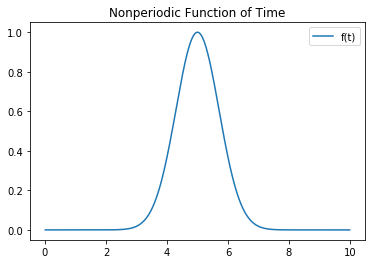

In [193]:
t = t[t != 0]
mu = 5
ft2 = np.exp(-(t-mu)**2 )
plt.plot(t, ft2, label = 'f(t)')
plt.title("Nonperiodic Function of Time")
plt.legend()
plt.show()

We can actually think of $f$ as a limit of periodic functions, where the period $T \to \infty$. The formal analytical result is complicated and beyond the scope of this article, but informally, this makes $\nu_0 \to 0$. As a result, instead of having nonzero coefficients for $\exp(- i \nu_0 n t)$ at a countably infinite number of frequencies (e.g. $\nu_0 n t$ for all integers $n$), as $T \to \infty$, the series turns into an integral instead:
$$ f(t) = \sum_{n = -\infty}^{\infty} c_n \exp(- i \nu_0 n t) \text{ becomes } \int_{- \infty}^{\infty} F(\nu) \exp(- i \nu t) d\nu  $$
We replace the coefficients $c_n$ with a function $F(\nu)$ because now there are an uncountable number of coefficients, so this is an easier way to represent them - but you can think $F(\nu)$ as returning the amplitude of the $\sin$ or $\cos$ waves with frequency $\nu t$ in the decomposition of $f$. In other words, whereas we conceptualized $f$ as a function of a time ($t$), whereas $F$ is a function of a frequency ($\nu$). 

Lastly, by convention, we usually multiply by $-2\pi$ in the exponent, but the two forms of the equation are equivalent:
$$f(t) = \int_{- \infty}^{\infty} F(\nu) \cdot \exp(2 \pi i \nu t) d\nu $$
which is the inverse Fourier transformation.

## Motivation of Forward Transform

The next question is obvious: how do we find the coefficients $F(\nu)$? If you were proving things rigorously, you would do a lot of calculus to prove that
$$f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \exp(i \nu t) \int_{-\infty}^{\infty} f(x) \exp(-i \nu x) dx d\nu  $$
so therefore we can set $F(\nu) = \int_{-\infty}^{\infty} f(x) \exp(-i \nu x) dx$. But why does this make sense intuitively?

Informally, we can think of $\int_{- \infty}^{\infty} f(x) \exp(-i \nu x)$ as measuring the "correlation" or "similarity" of $\exp(-i \nu x)$ and $f(x)$. If high values of $f(x)$ and high values of $\exp(-i \nu x)$ line up, then the integral should look very large: on the other hand, if low (negative) values of $f(x)$ line up with high values of $\exp(-i \nu x)$, the integral should look very negative.

The graphs below (informally) illustrate this by plotting various sinisoids and $f(t)$ together for various values of $\mu$. 

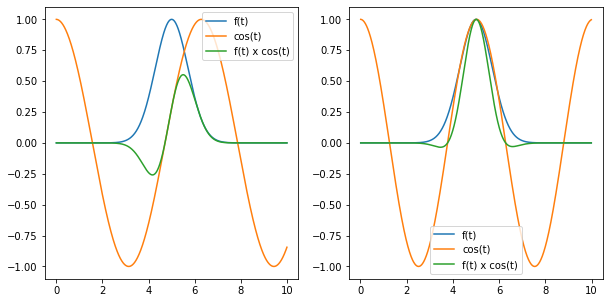

In [212]:
fig, (tax, bax) = plt.subplots(ncols = 2, figsize = (10, 5))
                               #subplot_kw = {'projection':'polar'})

tax.plot(t, ft2, label = 'f(t)')
tax.plot(t, np.cos(t), label = 'cos(t)')
tax.plot(t, np.cos(t)*ft2, label = 'f(t) x cos(t)')
tax.legend()

nu2 = 5/4
bax.plot(t, ft2, label = 'f(t)')
bax.plot(t, np.cos(nu2*t), label = 'cos(t)')
bax.plot(t, np.cos(nu2*t)*ft2, label = 'f(t) x cos(t)')
bax.legend()
plt.show()


## More Intuitions

### Guessing what Fourier Transform looks like

1. If a function is "spread out", its Fourier transform will be more spread out. Two ways to see this: (1) it's less periodic and therefore requires more cancellations/complexity in the Fourier transform, (2) lower frequencies . Example: the Fourier transform of a Gaussian is 

### Connection with Characteristic Functions

A "convolution" of two functions $f$ and $g$ is the integral of them after reversing and scaling one of them (e.g. $g$). This explains why the sum of two independent random variables is called a convolution, because you're convolving the PDFs (you can see this with LOTP):

$$Z = X + Y \text{ for } X \text{ ind } Y \implies f_Z(z) = \int f_{Z|X}(z|x) f_X(x) dx = \int f_Y(z-x)f_X(x) $$

If $f$ and $g$ are two square-integrable functions and $h$ is their convolution, and $F$, $G$, and $H$ are their Fourier transforms, it turns out
$$F = G \cdot H$$
which corresponds to the point with characteristic functions that 
$$ \varphi_Z = \varphi_X \cdot \varphi_Y$$
for convolutions of $X$ and $Y$.

Sources

https://lpsa.swarthmore.edu/Fourier/Series/DerFS.html

princeton.edu/~cuff/ele201/kulkarni_text/frequency.pdf